##  **기계학습신경망 알아보기 - 심장병 예측**
### <b> <font color=green> [데이터 준비하기]     
### [신경망모델 구현하기-딥러닝] </font> </b>   
1) 라이브러리 가져오기 : import tensorflow as tf      
2) 모델 구성 선언하기 :model_dnn = tf.keras.Sequential()  
3) 모델 컴파일하기:model_dnn.compile()   
4) 모델 학습하기 : model_dnn.fit((X_train, y_train)     
5) 모델 예측하기 : model_dnn.predict(X_test)    
6) 모델 평가하기 : model_dnn.evaluate(X_test,y_test)   

-이 사람은 심장병에 걸렸는가?  
입력 : 키, 몸무게, 혈압, 혈중 산소농도, 염증수치  
-출력 : True/False
-로지스틱 회귀는 sigmoid를 사용하므로 결과값이 0~1사이 값으로 나옴   
-이진분류 모델에서 오차 함수는 Binary Cross Entropy (BCE) Loss Function     
- 평가 척도 : Precision(정확성)  심장병에 걸렸는가!!! 중요 (단 한 건의 하락(False)도 놓치면 안됨)


## <font color=green>**[ 데이터 준비하기 ]**

### **Step 1 : 라이브러리 가져오기**
* 데이터 전처리에 사용되는 라이브러리를 가져온다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

### **Step 2 : 데이터 확인하기**

1) 데이터 읽어 저장하기

In [2]:
df = pd.read_csv("./data/heart_disease.csv")
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


**[ 데이터 특성 ]**

| 열인덱스 |  컬럼명   | 설명 및 단위 |
|----------|-----------|--------------|
|    0     | Age       | 나이 |
|   1      | Sex       | 성별(1,0)  |
|   2      | ChestPain | 가슴통증 유형(0~3) |
|   3      | RestBP    | 휴식 혈압(resting blood pressure) |
|   4      | Chol      | 혈청 콜레스테롤(serum cholestoral in mg/dl)  |
|   5      | Fbs       | 공복 혈당(fasting blood sugar)  |
|   6      | RestECG   | 휴식심전도(resting electrocardiographic results)|
|   7      | MaxHR     | 최대 심박수(maximum heart rate achieved) |
|   8      | ExAng     | 운동으로 인한 흉통(exercise induced angina)  |
|   9      | Oldpeak   | 심전도의 비정상 측정(oldpeak_eq_st_depression)  |
|   10      | Slope     | ST분절(the slope of the peak exercise ST segment)  |
|   11      | Ca        | 혈관의수(number of major vessels colored by flourosopy)   |
|   12      | Thal       | 심장에 혈류를 측정하는 Thallium stress test 결과  |
|   13      | AHD       | 심장병 진단  |

2) 데이터 정보 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [4]:
# 데이터 형태
df.shape

(303, 14)

3) 데이터 처리하기
- 데이터에 결측치 데이터가 있는지 확인한다.

In [5]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

- 데이터에 있는 결측치를 처리한다.

In [6]:
#코드작성

df = df.dropna()

- 결측치가 처리되었는지 확인한다.

In [7]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

- 문자열 데이터 항목 ‘ChestPain’의 값의 분포를 파악한다.

In [8]:
#코드작성
df["ChestPain"].value_counts()

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

- 문자열 데이터 항목 ‘Thal’의 값의 분포를 파악한다.

In [9]:
#코드작성
df["Thal"].value_counts()

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

- 문자열 데이터 항목 ‘AHD’의 값의 분포를 파악한다.

In [10]:
#코드작성
df["AHD"].value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

- 문자열 데이터 항목 값을 숫자형으로 변환하도록 한다.

In [11]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
df = df.replace({"Yes":1, "No":0})                      #코드작성
df_data = pd.get_dummies(data=df, columns=["ChestPain", "Thal"])
                                                        #코드작성

df_data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,0,1,0,0,1,0


### **Step 3 : 기계학습 구현 준비하기**

1) 특성(입력값) 및 타깃(레이블) 항목 지정하기

- ‘AHD’ 이외 모든 항목을 특성(입력) 항목으로, AHD’를 타깃(클래스 레이블) 항목으로 지정한다.



In [13]:
X = df_data.drop(columns=["AHD"])#코드작성
y = df["AHD"]#코드작성

In [14]:
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     297 non-null    int64  
 1   Sex                     297 non-null    int64  
 2   RestBP                  297 non-null    int64  
 3   Chol                    297 non-null    int64  
 4   Fbs                     297 non-null    int64  
 5   RestECG                 297 non-null    int64  
 6   MaxHR                   297 non-null    int64  
 7   ExAng                   297 non-null    int64  
 8   Oldpeak                 297 non-null    float64
 9   Slope                   297 non-null    int64  
 10  Ca                      297 non-null    float64
 11  ChestPain_asymptomatic  297 non-null    uint8  
 12  ChestPain_nonanginal    297 non-null    uint8  
 13  ChestPain_nontypical    297 non-null    uint8  
 14  ChestPain_typical       297 non-null    ui

In [16]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

2) 학습/테스트 데이터 분리하기

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 18)
(60, 18)
(237,)
(60,)


3) 데이터 정규화하기

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()     #코드작성
X_train = scaler.fit_transform(X_train)     #코드작성
X_test = scaler.transform(X_test)       #코드작성


"""
scaler = MinMaxScaler()     #코드작성
X_train = scaler.fit(X_train)
X_train = scaler.transform(X_train)     #코드작성
X_test = scaler.transform(X_test)       #코드작성
"""

'\nscaler = MinMaxScaler()     #코드작성\nX_train = scaler.fit(X_train)\nX_train = scaler.transform(X_train)     #코드작성\nX_test = scaler.transform(X_test)       #코드작성\n'


## <font color=green>**[ 기계학습 신경망모델 구현하기 ]**

### **Step 1 : 라이브러리 가져오기**
> 텐서플로우 딥러닝 프레임워크에서 케라스-텐서플로우 2.0 인 딥러닝 API를 사용하여 사용하여 DNN(Deep Neural Network, 심층신경망) 으로 학습하기

밑의 코드가 안되면 `kernel`에 `pip install tensorflow` 실행

In [23]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [24]:
# TensorFlow and tf.keras
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### **Step 2 : 모델 구성하기**  
1) 이진분류 DNN 모델 구성하기

In [26]:
print(X_train.shape[1])

input_shape = X_train.shape[1]

18


In [25]:
model_dnn = tf.keras.Sequential([    
    tf.keras.layers.Dense(16,  activation='relu', input_shape=(18,)),
    # tf.keras.layers.Dense(16,  activation='relu', input_shape=(input_shape,)),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1,   activation='sigmoid')
    ])

C:\Users\IOT\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


==

In [27]:
#다음과 같이 모델을 구성할 경우 'Import "tensorflow.keras.models" could not be resolved' 프롬프트가 나타나지만 코드 실행에는 영향을 주지는 않음

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dnn = Sequential()
model_dnn.add(Dense(16, activation='relu', input_shape=(18,)))
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dense(1, activation='sigmoid'))

2) 모델 확인하기
> output_param # = dot(W, input) + b

In [28]:
model_dnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,609 (10.19 KB)

 Trainable params: 2,609 (10.19 KB)

 Non-trainable params: 0 (0.00 B)

304 = 16 x 18 + 16<br>
       가중치 + bias

### **Step 3 : 모델 컴파일하기 - 이진분류모델**  

https://velog.io/@freesky/Optimizer

In [29]:
model_dnn.compile(optimizer='RMSprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

### **Step 4 : 모델 학습하기**  
> 훈련 데이터(X_train, y_train)로 선언한 Sequential 모델(model_dnn)을 이용하여 학습(fit)하고 학습 과정을 histroy 에 저장하기
- X, y : X_train, y_train
- validation_data=(X_test, y_test)
- epochs : 20번
- batch_size : 16

In [30]:
history = model_dnn.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        # 원래라면 한번 더 쪼개서 써야함
                        # 이 코드의 경우, accuracy, val_accuracy 이런게 있다는 것을 보여주기 위해
                        epochs=10,
                        batch_size=32)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6646 - loss: 0.6722 - val_accuracy: 0.8833 - val_loss: 0.6179
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.6164 - val_accuracy: 0.8833 - val_loss: 0.5679
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8286 - loss: 0.5710 - val_accuracy: 0.8833 - val_loss: 0.5280
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8160 - loss: 0.5419 - val_accuracy: 0.8833 - val_loss: 0.4912
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8220 - loss: 0.5200 - val_accuracy: 0.8833 - val_loss: 0.4569
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8239 - loss: 0.4983 - val_accuracy: 0.8833 - val_loss: 0.4213
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8142 - loss: 0.4800 - val_accuracy: 0.8833 - val_loss: 0.3962
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.4489 - val_accuracy: 0.8833 - val_loss: 0.3747
Epoch 9

### **Step 5 : 모델 예측 및 평가하기**
#### 1) 모델 예측하기
- 학습된 모델을 사용하여 테스트 데이터(X_test)에 대한 예측값을 y_pred에 저장한다.

In [31]:
y_pred = (model_dnn.predict(X_test) > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


- 테스트 데이터세트의 실젯값인 y_test와 모델이 예측한 y_pred를 출력해본다.

In [32]:
df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result['Actual'] = y_test
df_result['Predicted'] = y_pred
df_result

,Actual,Predicted
169,0,0
214,1,0
63,0,0
155,1,1
5,0,0
77,0,0
185,0,0
159,0,0
9,1,1
140,0,0


#### 2) 분류 모델 성능 평가하기
- 테스트 데이터세트(X_test,y_test)로 모델의 성능을 평가(evaluate( ))한다.

In [33]:
test_loss, test_acc = model_dnn.evaluate(X_test,y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - 11ms/step - accuracy: 0.8833 - loss: 0.3473

Test accuracy: 0.8833333253860474


- 분류 평가 리포트를 출력하여 다양한 분류 평가 지표를 확인해본다.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



- 학습 과정을 그래프로 나타내어 학습 횟수가 증가할수록 모델의 성능이 어떻게 변화하
는지 그 과정을 도식화한다.

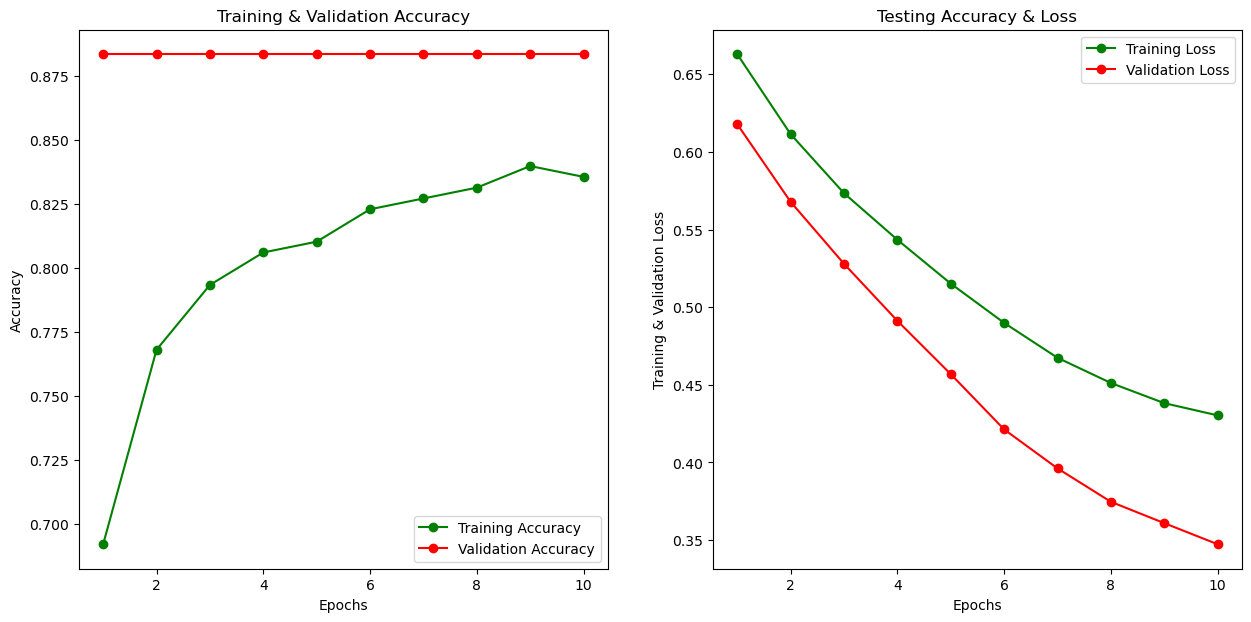

In [34]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(15,7)

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()